# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['retina'] 

In [2]:
info_patents = pd.read_pickle("../info_patents")
info_companies = pd.read_csv("./Data/info_companies.csv")

In [3]:
info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040
...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059


# Getting proportion of marked patents over unmarked for each company

In [4]:
# list_companies = list(info_companies.assignee_id)
# dict_companies = {key:0 for key in list_companies}

# for el in info_patents[info_patents.marked==1].assignee_id:
#     if el!=None:
#         for idi in el:
#             if idi != None:
#                 dict_companies[idi]+=1

# info_companies['nb_marked_patents']=info_companies.assignee_id.map(dict_companies)

# info_companies['proportion_marked_patents']=(info_companies.nb_marked_patents/info_companies.assignee_total_num_patents).round(3)

# info_companies

In [5]:
# info_companies.to_csv('./Data/info_companies.csv',index=False)

[]

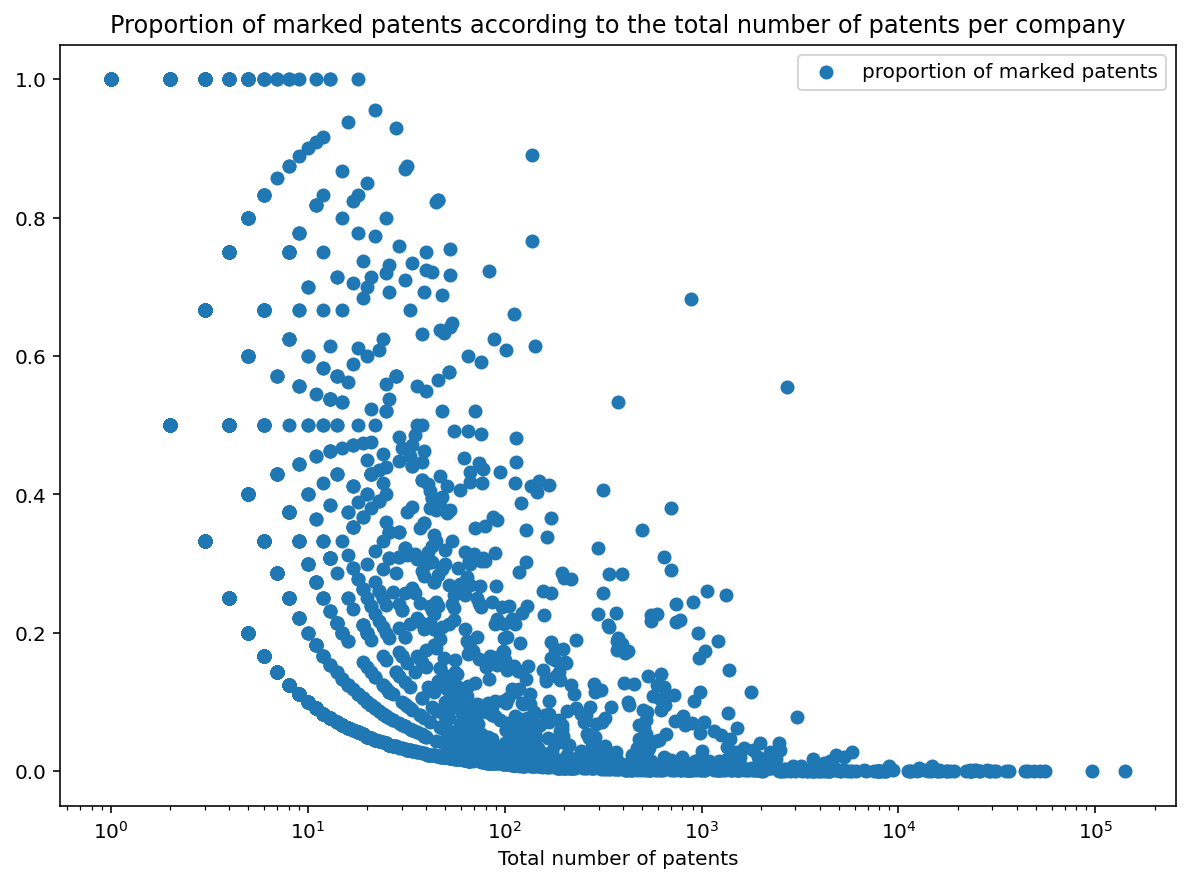

In [114]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.assignee_total_num_patents,info_companies.proportion_marked_patents,marker = 'o',label='proportion of marked patents')
plt.xscale('log')
plt.xlabel('Total number of patents')
plt.legend()
plt.title("Proportion of marked patents according to the total number of patents per company")
plt.plot()

In [111]:
mean_prop = []

In [112]:
for el in list(np.unique(info_companies.assignee_total_num_patents)):
    tmp = np.mean(info_companies[info_companies.assignee_total_num_patents==el].proportion_marked_patents)
    mean_prop.append(tmp)

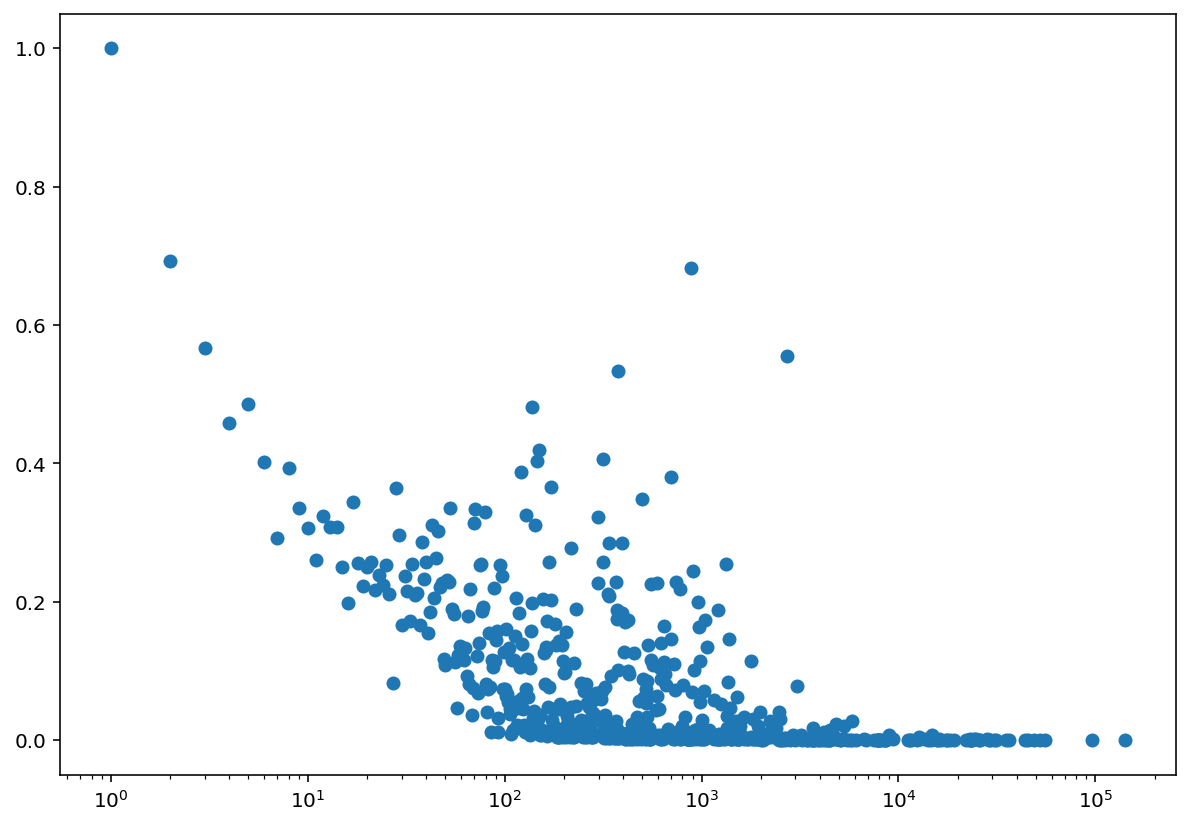

In [113]:
plt.figure(figsize=(10,7))
plt.scatter(list(np.unique(info_companies.assignee_total_num_patents)),mean_prop)
plt.xscale('log')
#plt.sycale('log')

# Cleaning the df of info_patents

In [12]:
info_patents = info_patents.dropna()

mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(info_patents.ipc_section),columns=mlb.classes_, index=info_patents.index)
dummies = dummies[['A','B','C','D','E','F','G','H']]

for el in list(dummies.columns):
    info_patents[el]=dummies[el]

patents_to_drop = info_patents[(info_patents.A==0) & (info_patents.B==0) & (info_patents.C==0) & (info_patents.D==0) & (info_patents.E==0) & (info_patents.F==0) & (info_patents.G==0) & (info_patents.H==0)].patent_number
info_patents_red = info_patents[~info_patents.patent_number.isin(list(patents_to_drop))]
info_patents_red = info_patents_red[info_patents_red.patent_processing_time.apply(lambda x: str(x).isdigit())].reset_index(drop=True)

In [17]:
info_patents = info_patents_red

In [18]:
ipc_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
repartition_marked = []
repartition_unmarked = []
repartition_total = []

for index, el in enumerate(ipc_class):
    nb_marked = info_patents[info_patents.marked==1][el].value_counts()[1]
    nb_unmarked = info_patents[info_patents.marked==0][el].value_counts()[1]
    repartition_marked.append(nb_marked)
    repartition_unmarked.append(nb_unmarked)
    repartition_total.append(nb_marked+nb_unmarked)

In [19]:
np.sum(repartition_total)

1592034

<BarContainer object of 8 artists>

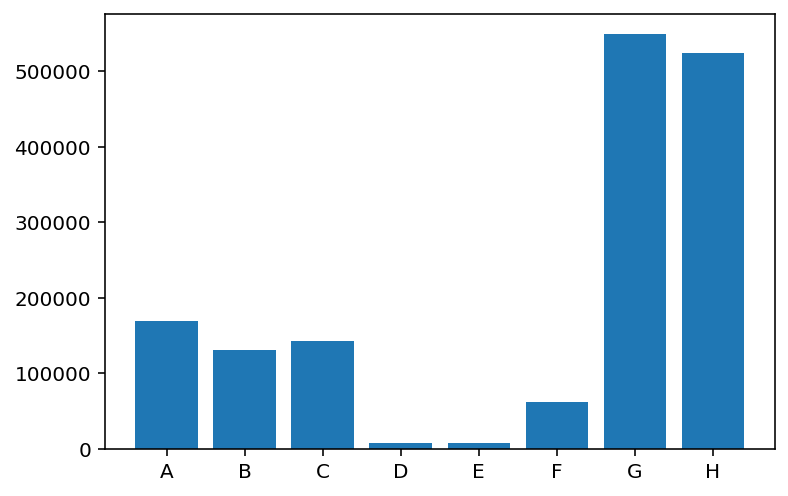

In [22]:
plt.bar(ipc_class,repartition_total)